<a href="https://colab.research.google.com/github/rashakil-ds/Deep-Learning-with-Python/blob/master/LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
UP =  files.upload()

Saving lstm data.csv to lstm data.csv


In [2]:
import pandas as pd
df =pd.read_csv ('lstm data.csv', header=None, index_col=None, delimiter=',')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [5]:
input_file = df

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
# fix random seed for reproducibility
np.random.seed(5)

In [7]:
# take close price column[5]
all_y = df[5].values
dataset=all_y.reshape(-1, 1)

In [8]:
# take close price column[5]
all_y = df[5].values
dataset=all_y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [10]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=240, verbose=1)

Epoch 1/20
10/10 [==============================] - 3s 7ms/step - loss: 0.0060
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 7.3312e-04
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 6.2153e-04
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 5.4827e-04
Epoch 8/20
10/10 [==============================] - 0s 13ms/step - loss: 4.9733e-04
Epoch 9/20
10/10 [==============================] - 0s 8ms/step - loss: 4.8755e-04
Epoch 10/20
10/10 [==============================] - 0s 8ms/step - loss: 4.4003e-04
Epoch 11/20
10/10 [==============================] - 0s 5ms/step - loss: 3.9734e-04
Epoch 12/20
10/10 [==============================] - 0s 4ms/step - loss: 3.7042e-04
Epoch 13/20


In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [14]:
trainPredict

array([[0.11482746],
       [0.11490844],
       [0.11595166],
       ...,
       [0.15892781],
       [0.15970123],
       [0.16205542]], dtype=float32)

In [15]:
testPredict

array([[0.15497756],
       [0.15336645],
       [0.15448435],
       ...,
       [0.6446615 ],
       [0.6525498 ],
       [0.65636975]], dtype=float32)

In [16]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [17]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.38 RMSE
Test Score: 11.82 RMSE


In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [19]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

testPrices:


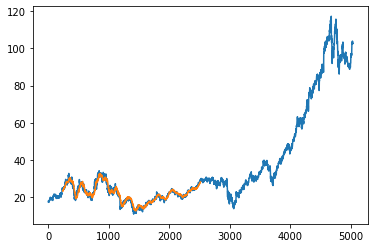

In [20]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

In [21]:
print('testPredictions:')
print(testPredict)

testPredictions:
[[27.462803]
 [27.291517]
 [27.41037 ]
 ...
 [79.52366 ]
 [80.36231 ]
 [80.768425]]


In [22]:
# export prediction and actual prices
df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(testPrices.reshape(-1)), decimals=2)})
df.to_csv("lstm_result.csv", sep=';', index=None)

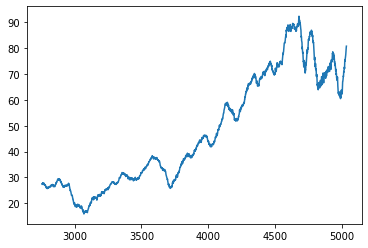

In [23]:
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()

